# Python Data Visualization: Part 1

* * * 

<div class="alert alert-success">  
    
### Learning Objectives 
    
* Understand the general principles and common pitfalls of data visualization.
* Gain familarity with key features of python plotting libraries, namely `matplotlib` and `seaborn`.
* Gain familarity with the syntax of `matplotlib` and `seaborn`.
* Use `seaborn` to visualize histogram, bar plot, and box plot.
    
</div>

### Icons Used in This Notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
🥊 **Challenge**: Interactive excersise. We'll work through these in the workshop!<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
🎬 **Demo**: Showing off something more advanced – so you know what Python can be used for!<br> 

### Sections
1. [Principles of Data Visualization](#section1)
2. [Python Libraries for Visualization](#section2)
3. [Histogram](#section3)
4. [Bar Plot](#section4)
5. [Box Plot](#section5)
6. [Demo: Overlay a Strip Plot on Top of the Box Plot](#demo1)

<a id='section1'></a>

# Principles of Data Visualization

Visualization is meant to convey information.

> The power of a graph is its ability to enable one to take in the quantitative information, organize it, and see patterns and structure not readily revealed by other means of studying the data.

\- Cleveland and McGill, 1984

That said, to accurately and efficiently communicate the information hidden within the data, we should also be aware of the common pitfalls of data visualization.

It's always good to sit back and ask ourseleves:
- Does the plot include sufficient text descriptions (e.g. labels, legend, and title)?
- Does the plot has an approriate size and scale?
- Does the plot contain too much or too little data?
- Does the plot include a common scale for group comparison?
- And does the chosen color contrast accurately convey the differences?

The answers to these questions vary depending on the data we have and the message we want to convey through the plot.

Throughout the workshop, we will discuss the decisions we need to make when encountering such questions, as well as the solutions to address them.

<a id='section2'></a>

# Python Libraries for Visualization



## Import Libraries

In [1]:
# Import pandas and assign it to an alias `pd`
import pandas as pd

# Import matplotlib and assign it to an alias `mpl`
import matplotlib as mpl 

# Import matplotlib.pyplot and assign it to an alias `plt`
import matplotlib.pyplot as plt

# Import seaborn as assign to an alias `sns`
import seaborn as sns

💡 **Tip**: `pyplot` is a collection of command style functions that make matplotlib work like MATLAB and save many lines of repeated code. By convention, `pyplot` is aliased to `plt`, which we just did in the above import cell. 

## When to use each package

`matplotlib`:
- Versatile (basic and complex plots)
- Foundation of using other packages
- Lengthy syntax
- Ideal for customization
- Not ideal for presentation and publication

`pandas`:
- Plot basic plots
- Handy to use for Exploratory Data Analysis (EDA)
- Well connected with `pandas`
- Not ideal for custimization

`seaborn`:
- Easier for complex plots 
- Shorter syntax
- Require knowledge of reading documentation
- Well connected with `pandas`
- Ideal for customization and presentation

In [2]:
%matplotlib inline

💡 **Tip**: One of the nice features of Jupyter notebooks is that figures can be plotted inline, which means they appear below the code cell that creates them. This is not the default behavior however, and so we'll use the below **"Magic"** statement (these statements are added to solve simple problems) to tell the Jupyter notebook to plot the figures inline (instead of opening a separate browser window to show them).

## Import the Data Set

We've decided to use the so-called Gapminder dataset, which was compiled by Jennifer Bryan. This dataset contains several key demographic and economic statistics for many countries, across many years. For more information, see the [gapminder](https://github.com/jennybc/gapminder) repository.

We'll use the `pandas` Python package to load the `.csv` (**c**omma **s**eparated **v**alues) file that contains the dataset. The `pandas` package provides `DataFrame` objects that organize datasets in tabular form. To read in a `.csv` file we simply use the function `pd.read_csv()`. This `.csv` file happens to be tab-delimited, so we need to specify `sep=\t`.

In [3]:
gm = pd.read_csv('../data/gapminder.tsv', sep='\t')

To look at the first few rows of the dataset, we will use the `.head()` method of the dataframe.

In [4]:
gm.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333.0,779.445314
1,Afghanistan,Asia,1957,30.332,9240934.0,820.853030
2,Afghanistan,Asia,1962,31.997,10267083.0,853.100710
3,Afghanistan,Asia,1967,34.020,11537966.0,836.197138
4,Afghanistan,Asia,1972,36.088,13079460.0,739.981106


It looks like we have information about life expectancy (`lifeExp`), population (`pop`) and per-capita GDP (`gdpPercap`), across multiple years per country. 

To start off, let's say we want to explore the data from the most recent year in the dataset. First we'll find the maximum value for year, and then create a second `DataFrame` containing data from only that year. We'll do that using Boolean Masking (for an introduction on how to use `pandas`, see the D-lab's [Python Data Wrangling](https://github.com/dlab-berkeley/introduction-to-pandas)).

In [5]:
gm['year'].min()

1952

In [6]:
gm['year'].max()

2007

In [7]:
latest_year = gm['year'].max()
latest_year

2007

In [8]:
gm_latest = gm[gm['year'] == latest_year]
gm_latest.head()

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923.0,974.580338
23,Albania,Europe,2007,76.423,3600523.0,5937.029526
35,Algeria,Africa,2007,72.301,33333216.0,6223.367465
47,Angola,Africa,2007,42.731,12420476.0,4797.231267
59,Argentina,Americas,2007,75.320,40301927.0,12779.379640


In [9]:
gm_latest.shape

(142, 6)

Ok, looks like we have 142 values, or rows, across our 6 variables, or columns.

💡 **Tip**: A method is written with parenteses: e.g. `gm_latest['year'].max()`. An attribute is written without parentheses: e.g. `gap.shape`.

Let's get an idea of how per-capita GDP was distributed across all of the countries during 2007 by calculating some **summary statistics**. We'll do that using the `.describe()` method.

In [10]:
gm_latest['gdpPercap'].describe()

count      142.000000
mean     11680.071820
std      12859.937337
min        277.551859
25%       1624.842248
50%       6124.371108
75%      18008.835640
max      49357.190170
Name: gdpPercap, dtype: float64

Across 142 countries the mean GDP was ~\\$11680, and the standard deviation was ~\\$12860! There was a lot of deviation in GDP across countries, but these summary statistics don't give us the whole picture. To get the whole picture, let's draw a picture! Or plot a figure, more accurately.

<a id='section3'></a>

# Histogram

## Basic Syntax and Main Ingredients

In this section, we'll explore the basic syntax of three plotting libraries, using **histograms** as a starting point. 

Histograms plot a discretized distribution of a one-dimensional dataset across all the values it has taken. They visualize how many of the data points are in each of $b$ bins, each of which has a pre-defined range. The GDP data is a perfect starting point for us to try out histograms as we'll be able to visualize the distribution of GDP across countries. 

## `matplotlib`

Syntax: call the **library** (`plt`), followed by the **plot type**: (`.hist()`): `plt.hist()`

Let's take a look at the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) for `plt.hist()` together. The input value that the function takes should be an array, so we pass in the `gdpPercap` column to the function. As a generic plotting method, the function `plt.hist()` itself is not specific to the data we are plotting, so we need to pass in the data we want to plot.

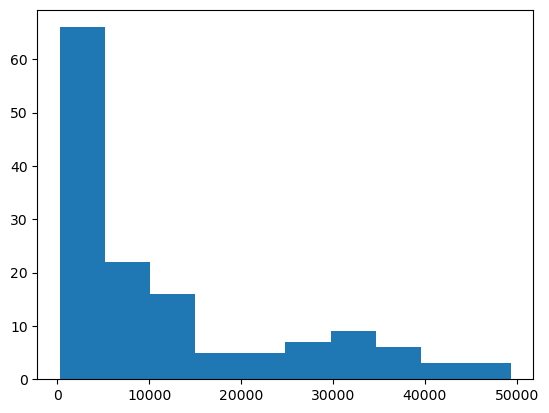

In [12]:
# default bin size: 10
plt.hist(gm_latest['gdpPercap']);

💡 **Tip**: Use a semicolon (`;`) at the end of the last line in a Jupyter notebook cell to suppress the notebooks from printing the return value of the last line. This was done in the above cell. Try removing the `;` to see how the output changes.

Each line in the histogram represents a bin. The height of the line corresponds to the number of items (countries in this case) within the range of values covered by the bin. In the previous plots, we used the default number of bins (10). Now, let's increase the number of bins by specifying the `bins=30` parameter.

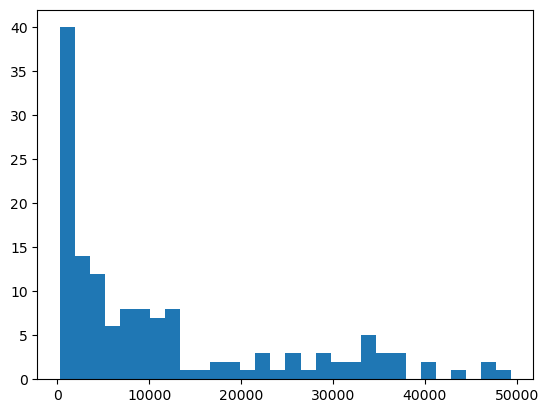

In [14]:
plt.hist(gm_latest['gdpPercap'], bins=30);

This histogram tells us that many of the countries had a low GDP, which was less than 5,000. There is also a second "bump" in the histogram around 30,000. This type of distribution is known as **bi-modal**, since there are two modes, or common values.

To make this histogram more interpretable let's add a title and labels for the x and y axes. We'll pass strings to `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` to do so.

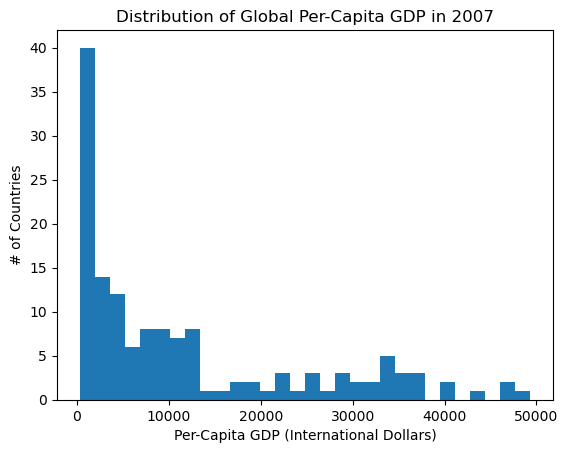

In [16]:
plt.hist(gm_latest['gdpPercap'], bins=30)

plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (International Dollars)')
plt.ylabel('# of Countries');

## `pandas`

Syntax: call the **dataframe** (`gm_latest`), followed by the plot type (`.hist()`): `gm_latest.hist()`

Let's take a look at [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) of `pd.hist()`. The required input value is a column of a dataframe. We no longer need to select the column using square brackets; instead, we simply pass the name of the column to the column parameter. This highlights how `pandas` differs from `matplotlib`. The function `pd.hist()` is not intended to be a generic plotting method; rather, it is specific to the dataframe where the data comes from. 

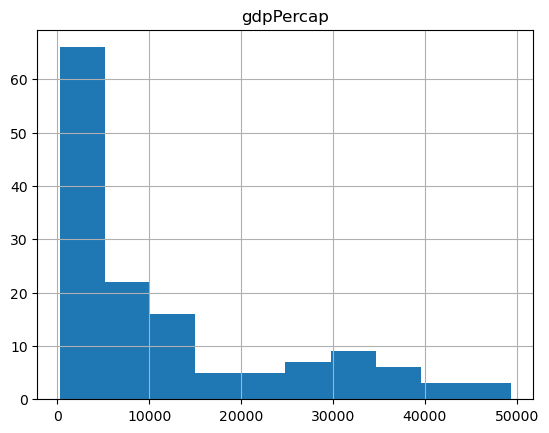

In [17]:
gm_latest.hist(column='gdpPercap');

We can remove the grid by specifying `grid=False`; to make the plot complete, let's add the title and labels. 

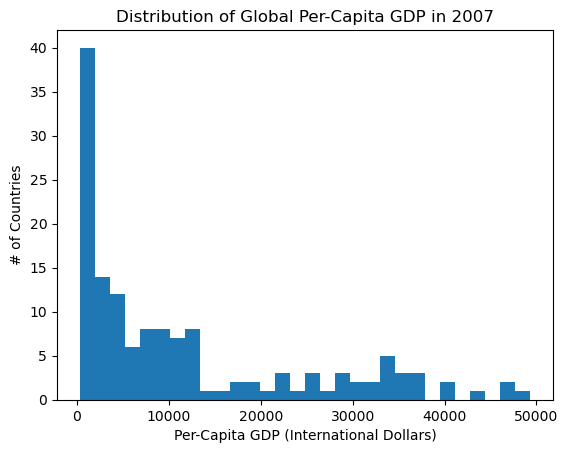

In [18]:
gm_latest.hist(column='gdpPercap', bins=30, grid=False)

plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (International Dollars)')
plt.ylabel('# of Countries');

## `seaborn`

Syntax: call the **library** (`sns`), followed by the plot type (`.histplot()`): `sns.histplot()`

Let's check out the [documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html) of `sns.histplot()`. A `seaborn` plotting function typically requires two things: the dataframe and the specific subset of the data we want to plot. In this case, we pass `gm_latest` to the `data` parameter to indicate that the GDP data we want to plot comes from the `gm_latest` dataframe. We then specify `x='gdpPercap'` to indicate that the column we want to plot is `gdpPercap`. Now you can see that `sns.histplot()` is still a generic plotting function, but it integrates well with `pandas`. 

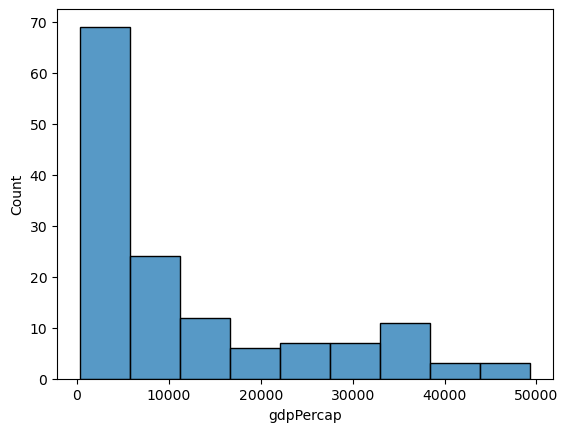

In [19]:
sns.histplot(data=gm_latest, x='gdpPercap');

🔔 **Question**: Is there someting that is not in the histogram created by `plt.hist`?

We can of course change the labels, still using the `plt` function calls as above.

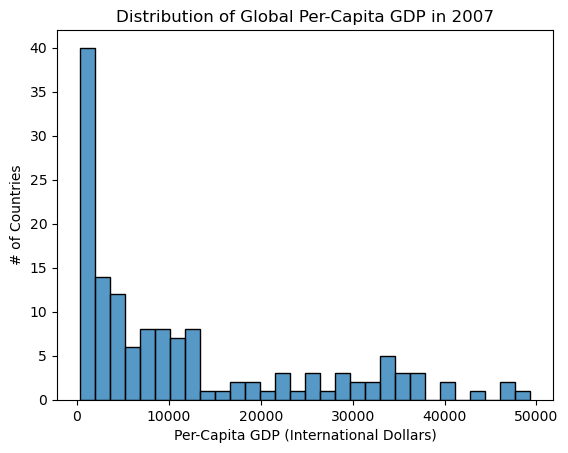

In [20]:
sns.histplot(data=gm_latest, x='gdpPercap', bins=30)

plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (International Dollars)')
plt.ylabel('# of Countries');

Now we have known the basic syntax of each plotting library. What's your favourite one? 

Throughout the rest of the workshop, we will mainly use `seaborn` to visualize all kinds of plots. Importantly, it should be noted that `seaborn` is built on top of `matplotlib`; behind the scene, `seaborn` uses matplotlib to draw plots but it provides users a high-level interface that is easier to learn and interact.  

## Kernal Density Plot

Histograms represent the distribution with discrete bins. A similar method is called Kernel Density Plot (KDE), which visualizes the distribution with a continuous probability density curve. KDE can be plotted independently; quite frequently, it is overlaid with histograms. In Seaborn, achieving this is straightforward by enabling the `kde` parameter and simply setting it to `True`.

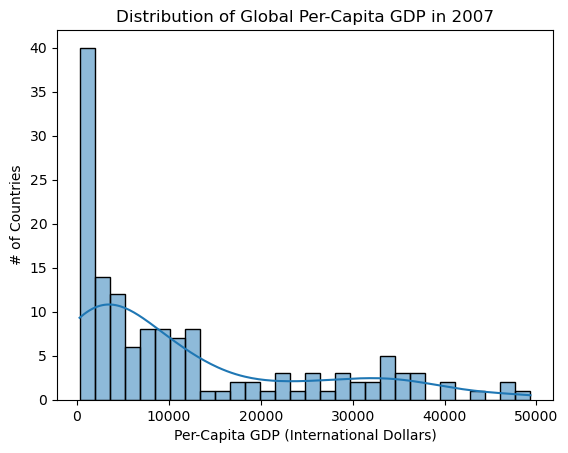

In [21]:
sns.histplot(data=gm_latest, 
             x='gdpPercap', 
             bins=30, 
             kde=True)

plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (International Dollars)')
plt.ylabel('# of Countries');

## Data Transformation

The above histograms plot the distribution of GDP of all countries. Let's take a closer look at the data of a continent, taking Asia and Africa as examples. 

Again, we use Boolean Masking to pass in the criterion of selection `gm['continent'] == Asia` to get the data from Asian contries only. Let's save it to a new variable called `asia`. 

We repeat the same steps to subselect data from African countries, passing it to a new variable `africa`. 

In [22]:
asia = gm.loc[gm['continent'] == 'Asia']
africa = gm.loc[gm['continent'] == 'Africa']

To plot the distribution of GDP of all Asian countries, we use histograms! For now, let's stick with `sns.histplot()`.

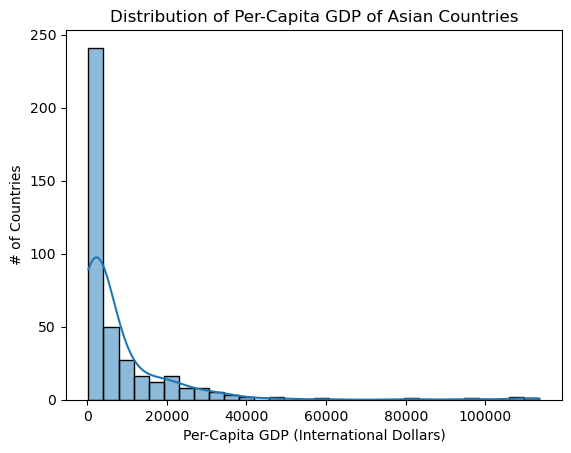

In [23]:
sns.histplot(data=asia, 
             x='gdpPercap', 
             bins=30,
             kde=True)

plt.title('Distribution of Per-Capita GDP of Asian Countries')
plt.xlabel('Per-Capita GDP (International Dollars)')
plt.ylabel('# of Countries');

It looks like most of the countries have a low GDP. The distribution is heavily skewed. Top deal with a skewed distribution like this, the convention is to transform the data so that the distribution is likely to follow a normal distribution, which is the foundation of make subsequent statistical analysis. 

Log transformation is often performed to remove skewness. To plot the log-transformed distribution, there is no need to actually perform the transformation. The seabon function `sns.histplot()` already comes with a handy parameter `log_scale`. We can pass `log_scale=True` to indicate that we want the distribution to be plotted on the log scale. 

Don't forget to revise the x-label, which now represents log-transformed GDP instead of raw GDP data. 

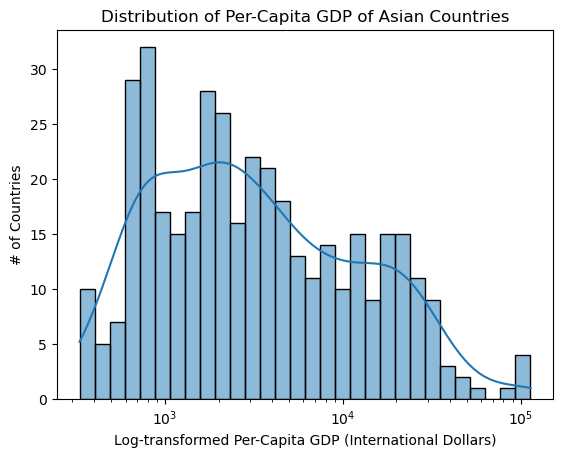

In [24]:
sns.histplot(data=asia, 
             x='gdpPercap', 
             bins=30,
             kde=True, 
             log_scale=True)

plt.title('Distribution of Per-Capita GDP of Asian Countries')
plt.xlabel('Log-transformed Per-Capita GDP (International Dollars)')
plt.ylabel('# of Countries');

We can recycle the above code and plot the log-transformed GDP data of African countries. 

To make the distinction even clearer, we can change the color of distribution, simply specifying `color="darkorange"`, also see [here](https://matplotlib.org/stable/gallery/color/named_colors.html) for a list of accepted color names. 

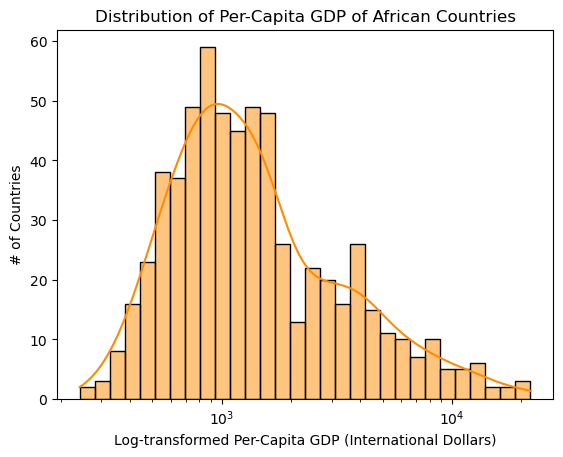

In [25]:
sns.histplot(data=africa, 
             x='gdpPercap', 
             bins=30,
             kde=True, 
             log_scale=True,
             color='darkorange')

plt.title('Distribution of Per-Capita GDP of African Countries')
plt.xlabel('Log-transformed Per-Capita GDP (International Dollars)')
plt.ylabel('# of Countries');

## 🥊 Challenge 1: Find the Parameter

Now we have the GDP distribution of two continents in two separate plots. Note that the y-axes are not on the same scale. To have a more informative comparison of these two distributions, it's better to have them in the same plot. 

The `sns.histplot()` function has a parameter that can help us do that! Spend some time reading the [documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html) of `sns.histplot()`, find the parameter that does that job and plot the distributions!

The data is ready for you to use. The `gm_subset` is a subset of the gapminder dataset, only including data from Asian and African countries. 

In [26]:
# starter code 
gm_subset = gm.loc[(gm['continent'] == 'Asia') | (gm['continent'] == 'Africa')]

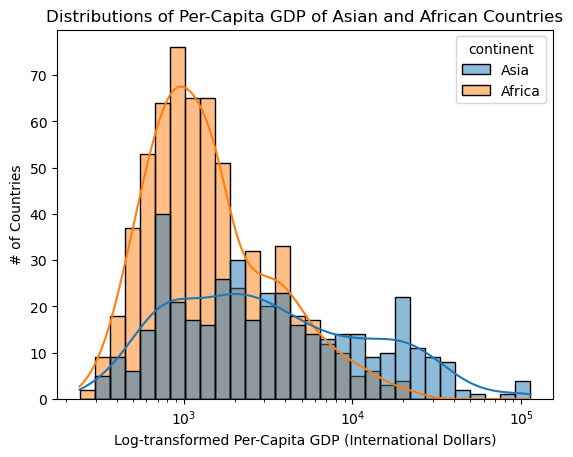

In [28]:

# YOUR CODE HERE


<a id='section4'></a>

# Bar Plot

The histograms we just learned are representations of one-dimentional, continuous data. If our data has categories or levels in nature, it's best to visualize them using bar plots. 

Bar plots are most commonly used to compare values of different groups; in other words, for each group, we have one single value (i.e. measure) to be compared with.


## Single measure

We can plot the number of countries per continent, which gives us one value for each group (i.e. continent).

We can of course take a look at the original `gm` dataset; for the purpose of simplicity, let's stick to the `gm_latest` dataset, thus taking a look at how many countries per continent was included in the year of 2007. 

We use the pandas `.groupby()` method to group the data by different continents, and then count the number of countries in each continent. The result itself is a pandas series, which we assign to the `count` variable. 

In [29]:
gm_latest

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923.0,974.580338
23,Albania,Europe,2007,76.423,3600523.0,5937.029526
35,Algeria,Africa,2007,72.301,33333216.0,6223.367465
47,Angola,Africa,2007,42.731,12420476.0,4797.231267
59,Argentina,Americas,2007,75.320,40301927.0,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356.0,2441.576404
1667,West Bank and Gaza,Asia,2007,73.422,4018332.0,3025.349798
1679,"Yemen, Rep.",Asia,2007,62.698,22211743.0,2280.769906
1691,Zambia,Africa,2007,42.384,11746035.0,1271.211593


In [30]:
count = gm_latest.groupby('continent')['country'].count()

Let's take a look at first five rows of `count`.

In [31]:
count.head()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

Now we have the data ready. The next step is to plot it with `seaborn`. 

Let's check the [documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html) of `sns.barplot`, which says that the function requires two parameters—`x` and `y`. On the x-axis, we want to plot the name of each continent; on the y-axis, we want the height of bars to represent the number of countries.

The index of `count` is exactly names of continents, which we can get by accessing the `.index` attribute of `count`.

In [32]:
count.index

Index(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype='object', name='continent')

Similarly, the values attribute give us the number of countries. 

In [33]:
count.values

array([52, 25, 33, 30,  2])

Let's pass in our `x` and `y` parameters. To adjust the order of bars, we simply pass in a list that orders the continent correctly. 

Note that `seaborn` automatically color-code the continent, assigning each one a unique color. 

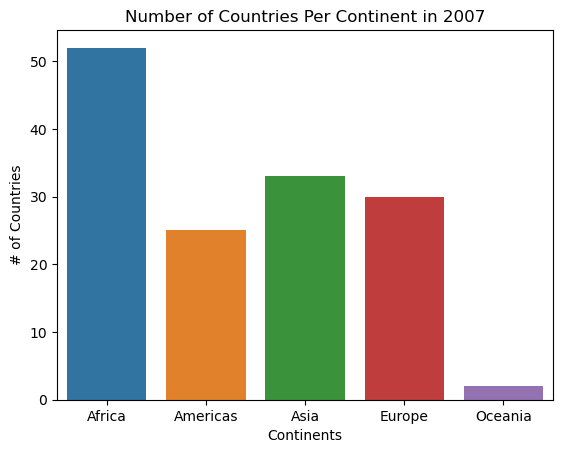

In [34]:
sns.barplot(x=count.index, 
            y=count.values)
plt.title('Number of Countries Per Continent in 2007')
plt.xlabel('Continents')
plt.ylabel('# of Countries');

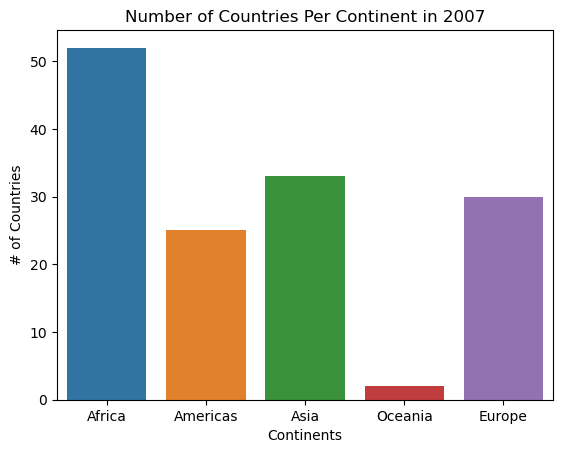

In [35]:
sns.barplot(x=count.index, 
            y=count.values, 
            order=['Africa', 'Americas', 'Asia', 'Oceania', 'Europe'])
plt.title('Number of Countries Per Continent in 2007')
plt.xlabel('Continents')
plt.ylabel('# of Countries');

## Repeated measures

Now we have a bar plot that visualizes the number of countries in each continent for the year 2007. Now, imagine another bar plot where, instead of representing the number of countries, the height of each bar corresponds to the GDP of a country within that continent. In this scenario, for each group (continent), we encounter multiple measurements (various GDP values). This is precisely the concept of "repeated measures."

You might ask, how do we visualize multiple GDP values per group? Let's dive into the [documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html) again and see how do we resolve the problem!

Now, the height of the bar does not correspond to GDP value of any specific country. It represents the mean GDP of that continent, aggregating the GDP data of all countries of that continent. 

🔔 **Question**: What does the vertical bar represent?

In [36]:
gm_latest

,country,continent,year,lifeExp,pop,gdpPercap
11,Afghanistan,Asia,2007,43.828,31889923.0,974.580338
23,Albania,Europe,2007,76.423,3600523.0,5937.029526
35,Algeria,Africa,2007,72.301,33333216.0,6223.367465
47,Angola,Africa,2007,42.731,12420476.0,4797.231267
59,Argentina,Americas,2007,75.320,40301927.0,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356.0,2441.576404
1667,West Bank and Gaza,Asia,2007,73.422,4018332.0,3025.349798
1679,"Yemen, Rep.",Asia,2007,62.698,22211743.0,2280.769906
1691,Zambia,Africa,2007,42.384,11746035.0,1271.211593


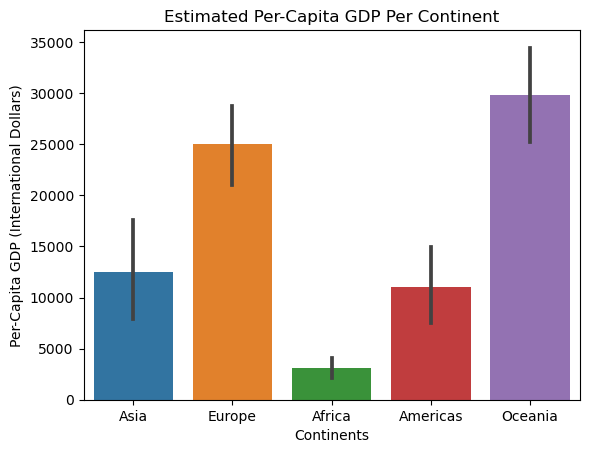

In [37]:
sns.barplot(data=gm_latest, 
            x="continent", 
            y="gdpPercap")
plt.title('Estimated Per-Capita GDP Per Continent')
plt.xlabel('Continents')
plt.ylabel('Per-Capita GDP (International Dollars)');

## 🥊 Challenge 2: Compare GDP Growth

For the barplot shown above, we plotted the mean GDP of the year 2007. What if we want to compare the data from 1952 and 2007? Spend some time reading the [documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html), and find out what is the parameter that is used as a group/level indicator.

The data is ready for you to use. The `gm_year` is a subset of the gapminder dataset, only including data from 1952 and 2007.

In [38]:
# starter code
gm_year = gm[(gm['year'] == 2007) | (gm['year'] == 1952)]

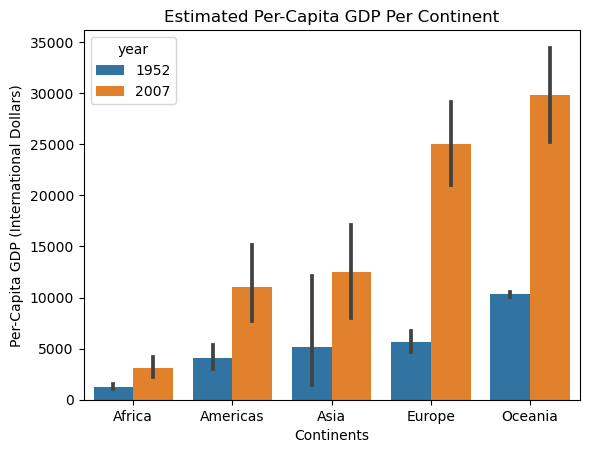

In [40]:

# YOUR CODE HERE


<a id='section5'></a>

# Box Plot

Now that we know we've seen how GDP was distributed during 2007, and how many countries are in each continent, we might want to know how GDP is distributed within each continent. While we could plot 5 histograms, we can also take advantage of a useful type of plot for just this purpose, a **boxplot**.

<img src="../images/boxplot.png"  width="70%" height="40%">

The above graph is a handy decomposition of a boxplot. The boxplot describes the locality (i.e. median), range (from Q1 to Q3), spread (the two whiskers extending from the box), and extreme values (outliers that are further away from the upper and lower bounds). 

Note that a single box plot is to visualize the distribution of a single dimension data, for instance, the distribution of GDP of Asian countries. 

If we want to show the distribution of countries across five different continents? How to do that?

Let's take a look at the [documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html) of `sns.boxplot`. 

Typically, on the x-axis, we want to show information of groups, i.e. continents; and on the y-axis, we want to show the distribution of data we are interested--GDP. 

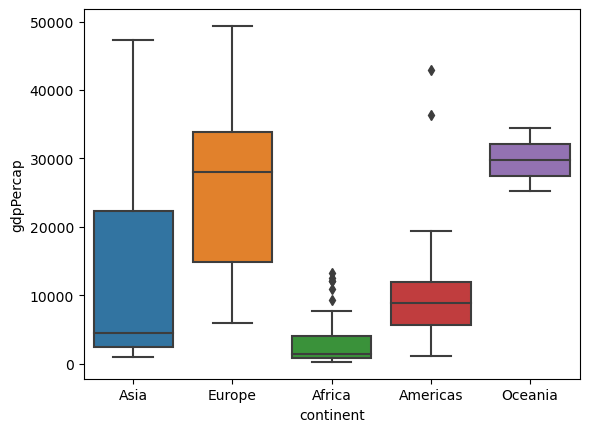

In [41]:
sns.boxplot(data=gm_latest, x='continent', y='gdpPercap');

The `order` parameter changes the order of the groups on the x-axis. It takes in a list of strings, which store the categorical levels. 

Let's rearrange the order of continents. 

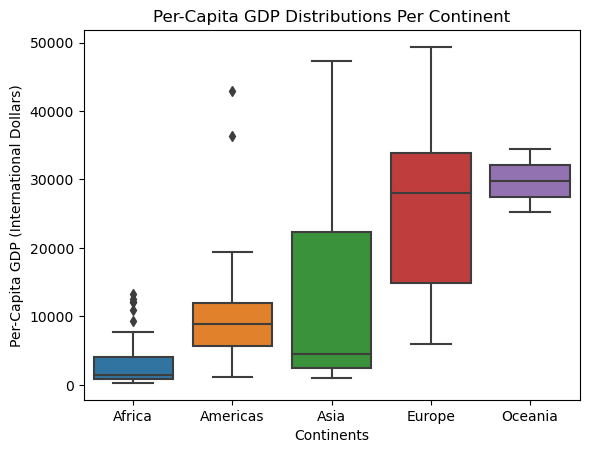

In [42]:
sns.boxplot(data=gm_latest, 
            x='continent', 
            y='gdpPercap',
            order=['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'])

plt.title('Per-Capita GDP Distributions Per Continent', fontsize=12)
plt.xlabel('Continents')
plt.ylabel('Per-Capita GDP (International Dollars)');

We can also change asthetics of the plot. To name a few, we can change line width, box width, the colors of the boxs, as well as the size of the flier. 

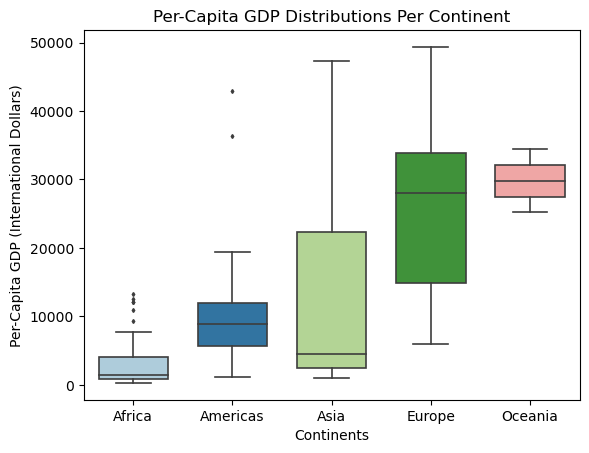

In [43]:
sns.boxplot(data=gm_latest, 
            x='continent', 
            y='gdpPercap',
            order=['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'],
            fliersize = 2, # size of the flier / outlier
            linewidth = 1.2, # line width 
            width = 0.7, # width of the box
            palette = 'Paired') # the color palette 

plt.title('Per-Capita GDP Distributions Per Continent', fontsize=12)
plt.xlabel('Continents')
plt.ylabel('Per-Capita GDP (International Dollars)');

If flier size is set to 0, then outliers will not be shown. 

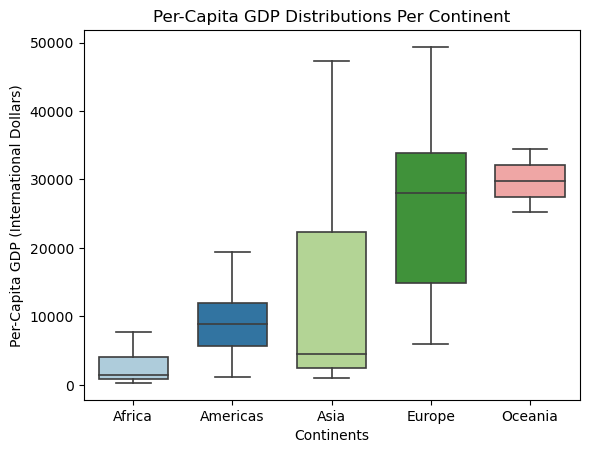

In [45]:
sns.boxplot(data=gm_latest, 
            x='continent', 
            y='gdpPercap',
            order=['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'],
            fliersize = 0, # size of the flier = 0
            linewidth = 1.2, 
            width = 0.7, 
            palette = 'Paired')

plt.title('Per-Capita GDP Distributions Per Continent', fontsize=12)
plt.xlabel('Continents')
plt.ylabel('Per-Capita GDP (International Dollars)');

## 🥊 Challenge 3: Reference Line

What if we want to plot a horizontal reference line on the boxplot, indicating the mean GDP of all countries in the year of 2007? Try to interpret the boxplot with the additional information provided by the reference line. 

In [46]:
# starter code
gm_latest['gdpPercap'].mean()

11680.071819878167

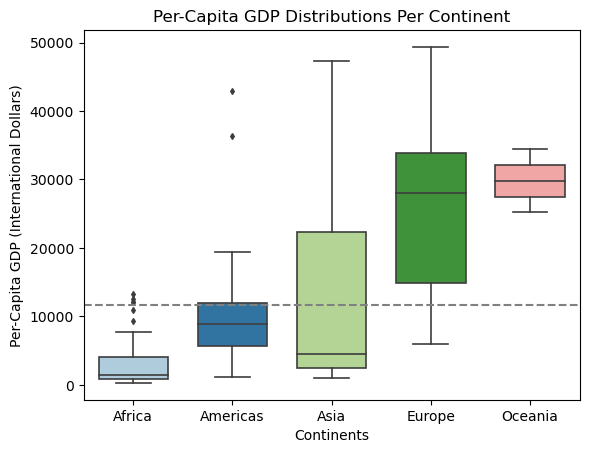

In [48]:

# YOUR CODE HERE


🔔 **Question**: How to interpret the boxplot with the additional information from the reference line?

<a id='demo1'></a>

## 🎬 **Demo**: Overlay a Strip plot on Top of the Box Plot

The strip plot is analogous to the box plot. It is typically drawn to complement a box plot. You can think of it as a single-dimensional scatter plot, showing all individual data points of a distribution. 

Let's take a look at the [documentation](https://seaborn.pydata.org/generated/seaborn.stripplot.html) of `sns.stripplot`; you will find it similar to `sns.boxplot`. 

In seaborn/matplotlib, we can overlay multiple stacks of plotting details. 

For instance, we can first use `sns.boxplot` to create boxplots of GDP, setting the color of box to white. We then add another layer of details, creating a strip plot using `sns.stripplot`, which shows the entire distribution. 

/var/folders/lg/ly0nyv616nj7vqtsl1wcyj8c0000gn/T/ipykernel_44252/3520808190.py:12: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=gm_latest,


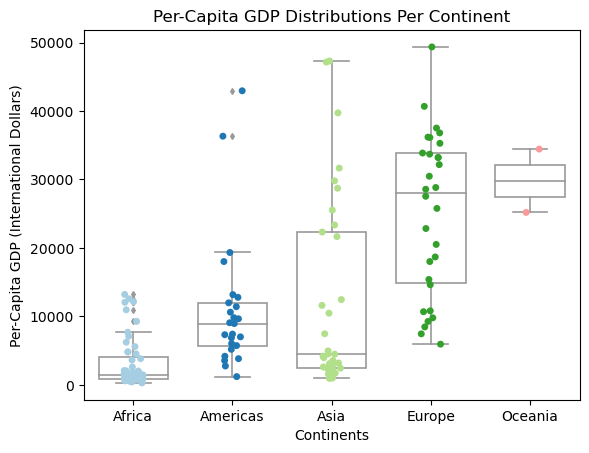

In [49]:
# create a boxplot
sns.boxplot(data=gm_latest, 
            x='continent', 
            y='gdpPercap',
            order=['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'],
            color='white',
            fliersize = 3,
            linewidth = 1.2,
            width = 0.7)

# create a strip plot
sns.stripplot(data=gm_latest, 
            x='continent', 
            y='gdpPercap',
            order=['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'],
            palette='Paired')

# add descriptive texts
plt.title('Per-Capita GDP Distributions Per Continent', fontsize=12)
plt.xlabel('Continents')
plt.ylabel('Per-Capita GDP (International Dollars)');

<div class="alert alert-success">

## ❗ Key Points

* It takes some time to be familiar with the syntax of python plotting libraries. 
* Always good to be aware of the caveats/pitfalls of each plot type. 
* Sit back and take a look at the plot you have and ask yourself what else is missing?

</div>